## Night Lights (one csv file)

This notebook works with separate files

Please do not dowload the h5 files in a csv file since I already have that file

- this one csv file would be useful but too large so I cannot work with it properly

### Import libraries

In [ ]:
import h5py
import numpy as np
import pandas as pd
import os
import heapq  # apparenty for efficient top-n tracking
import matplotlib.pyplot as plt
#!pip install cartopy

### Download data
!!!! do not transform in csv file again, I already have it

In [ ]:
#folder_path = "VNP46A4_2-20260213_103212"
#output_csv = "nightlight_pixels_europe_filtered.csv"

#first_file = True  # write header only once

#for filename in os.listdir(folder_path):
    if filename.endswith(".h5"):
        file_path = os.path.join(folder_path, filename)
        #with h5py.File(file_path, "r") as f:
            # Load brightness data
            data = f["HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/AllAngle_Composite_Snow_Free"][:]
            data[data < 0] = np.nan  # invalid pixels

            # Only keep pixels with intensity > 0
            mask = ~np.isnan(data) & (data > 0)
            if np.sum(mask) == 0:
                continue  # skip files with no nightlights

            # Load lat/lon vectors
            lat = f["HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lat"][:]
            #lon = f["HDFEOS/GRIDS/VIIRS_Grid_DNB_2d/Data Fields/lon"][:]

            # Create meshgrid for coordinates
            lon_grid, lat_grid = np.meshgrid(lon, lat)

            # Apply mask to only keep nightlight pixels
            flat_intensity = data[mask]
            flat_lat = lat_grid[mask]
            flat_lon = lon_grid[mask]

            # Optional: row/col indexes (if needed)
            rows, cols = np.where(mask)

            # Build DataFrame
           # df = pd.DataFrame({
                "file": filename,
                "row": rows,
                "col": cols,
                "lat": flat_lat,
                "lon": flat_lon,
                "intensity": flat_intensity
            })

            # Write to CSV incrementally
            df.to_csv(output_csv, mode="w" if first_file else "a", index=False, header=first_file)
            first_file = False

print("Saved filtered nightlight pixels to:", output_csv)

Saved filtered nightlight pixels to: nightlight_pixels_europe_filtered.csv


### Not working !!!

In [ ]:
csv_file = "nightlight_pixels_europe_filtered.csv"
top_n = 50

top_heap = []

chunksize = 1_000_000  # smaller chunks to be safe
columns = ["file", "row", "col", "lat", "lon", "intensity"]

for chunk in pd.read_csv(csv_file, usecols=columns, chunksize=chunksize):
    for _, row in chunk.iterrows():
        intensity = row['intensity']
        # Use heap to maintain top_n brightest
        if len(top_heap) < top_n:
            heapq.heappush(top_heap, (intensity, row))
        else:
            if intensity > top_heap[0][0]:
                heapq.heapreplace(top_heap, (intensity, row))

# top 50 rows
top_pixels = pd.DataFrame([row for (_, row) in sorted(top_heap, reverse=True)])

print(top_pixels)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Create the data frame

In [3]:
df_c = pd.read_csv("nightlight_pixels_europe_filtered.csv") # load file with pandas

df_c.head(30)

,file,row,col,lat,lon,intensity
0,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2388,54.258333,-10.050000,0.535961
1,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2389,54.258333,-10.045833,0.858666
2,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2390,54.258333,-10.041667,0.832306
3,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2391,54.258333,-10.037500,0.571215
4,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1379,2389,54.254167,-10.045833,0.829143
5,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1379,2390,54.254167,-10.041667,0.949057
6,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1379,2391,54.254167,-10.037500,0.768265
7,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1382,2399,54.241667,-10.004167,0.591297
8,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1383,2398,54.237500,-10.008333,0.568973
9,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1383,2399,54.237500,-10.004167,0.744531


### Top 50 most intens pixels

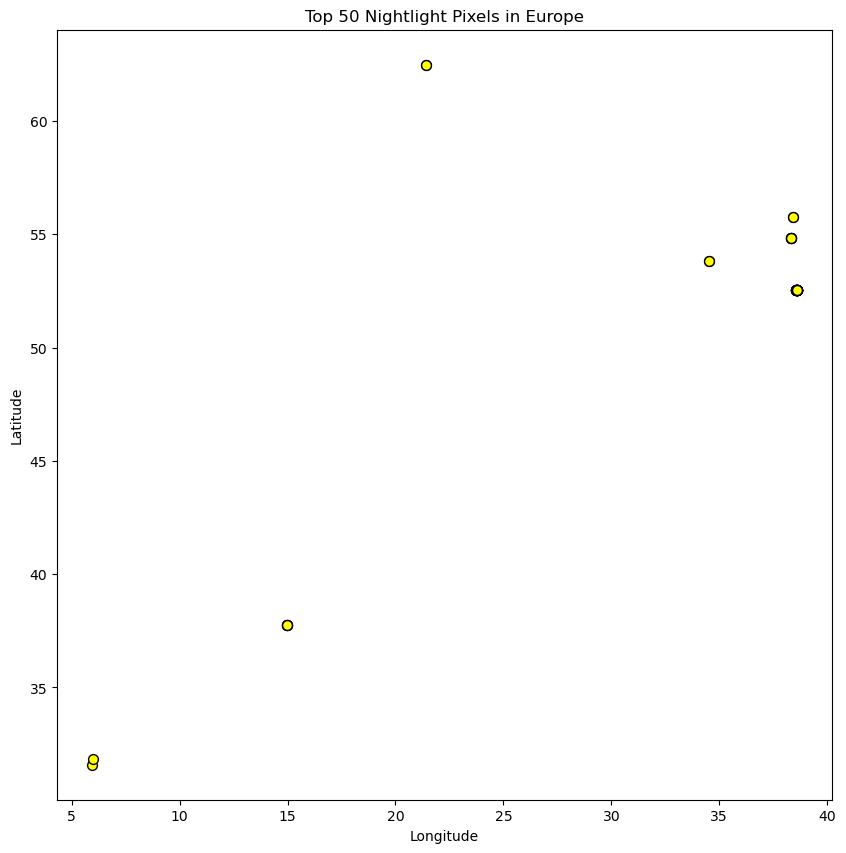

In [4]:
top50 = df_c.nlargest(50, 'intensity')  # fastest way to get top 50

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(top50['lon'], top50['lat'], s=50, c='yellow', edgecolors='black')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Top 50 Nightlight Pixels in Europe")
plt.show()

In [5]:
print("Total pixels:", len(df_c))
print("Number of files:", df_c['file'].nunique())
print("Intensity stats:")
print(df_c['intensity'].describe())  # min, max, mean, quartiles
print("Number of pixels with non-zero intensity:", (df_c['intensity'] > 0).sum())

Total pixels: 97835198
Number of files: 126
Intensity stats:
count    9.783520e+07
mean     3.731518e+00
std      4.359298e+01
min      5.554510e-03
25%      5.926876e-01
50%      7.562882e-01
75%      1.921255e+00
max      5.000000e+04
Name: intensity, dtype: float64
Number of pixels with non-zero intensity: 97835198


In [7]:
print("Latitude range:", df_c['lat'].min(), "to", df_c['lat'].max())
print("Longitude range:", df_c['lon'].min(), "to", df_c['lon'].max())

Latitude range: 30.004166666660417 to 80.0
Longitude range: -19.904166666666672 to 39.99583333333958


- this is the correct range even tho it overshoots a bit in S and N, because when the data was dowloaded the squares where predifined

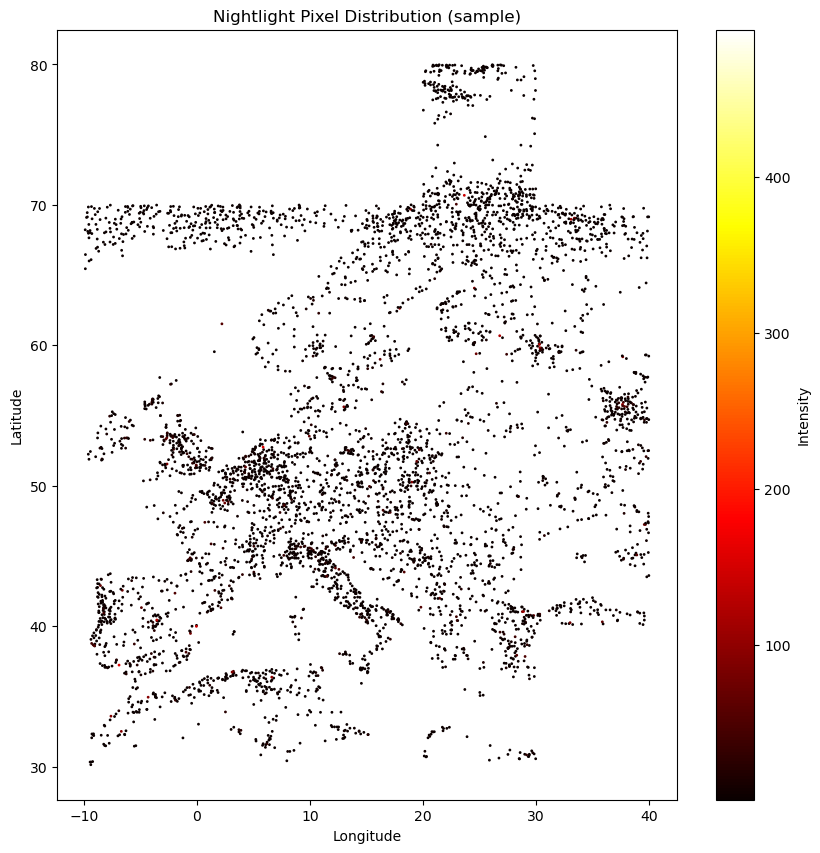

In [ ]:
# sample pixels
plot_sample = df_c[df_c['intensity'] > 0.5].sample(5000, random_state=42)

plt.figure(figsize=(10, 10))
plt.scatter(plot_sample['lon'], plot_sample['lat'], s=1, c=plot_sample['intensity'], cmap='hot')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Nightlight Pixel Distribution (sample)")
plt.colorbar(label="Intensity")
plt.show()

In [ ]:
# only for europe boundaries
#df_europe = df[(df['lat'] >= 34) & (df['lat'] <= 72) & (df['lon'] >= -25) & (df['lon'] <= 45)]

### Focus on separate years

#### Select the rows from from the same one file

In [18]:
#df_c['year'] = df_c['file'].str.extract(r'\.A(\d{4})')[0].astype(int)
#df_c

df_file = df_c[df_c["file"] == "VNP46A4.A2017001.h16v03.002.2025104183958.h5"]
df_file

,file,row,col,lat,lon,intensity
0,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2388,54.258333,-10.050000,0.535961
1,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2389,54.258333,-10.045833,0.858666
2,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2390,54.258333,-10.041667,0.832306
3,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1378,2391,54.258333,-10.037500,0.571215
4,VNP46A4.A2017001.h16v03.002.2025104183958.h5,1379,2389,54.254167,-10.045833,0.829143
...,...,...,...,...,...,...
3736,VNP46A4.A2017001.h16v03.002.2025104183958.h5,2342,54,50.241667,-19.775000,0.715668
3737,VNP46A4.A2017001.h16v03.002.2025104183958.h5,2343,45,50.237500,-19.812500,0.815065
3738,VNP46A4.A2017001.h16v03.002.2025104183958.h5,2344,44,50.233333,-19.816667,0.815065
3739,VNP46A4.A2017001.h16v03.002.2025104183958.h5,2344,45,50.233333,-19.812500,0.815065


#### Select all years for the same area
- based on the previous file

!!!! check again since i think there is a problem with the contrains (it should be instead of A2017)

In [19]:
df_2015 = df_c[df_c["file"].str.contains("A2015")]

print(df_2015.head())
print("Number of pixels in 2015:", len(df_2015))

MemoryError: Unable to allocate 746. MiB for an array with shape (97835198,) and data type float64

In [21]:
csv_file = "nightlight_pixels_europe_filtered.csv"
chunksize = 1_000_000  # read 1 million rows at a time

rows_2017 = []  # store filtered rows temporarily

for chunk in pd.read_csv(csv_file, chunksize=chunksize):
    # Keep only rows where 'file' contains 2015
    filtered = chunk[chunk['file'].str.contains("A2017")]
    rows_2017.append(filtered)

# Combine all filtered chunks (much smaller memory footprint)
df_2017= pd.concat(rows_2017, ignore_index=True)

print(df_2017.head())
print("Number of pixels in 2017:", len(df_2017))

MemoryError: Unable to allocate 256. MiB for an array with shape (2, 16799019) and data type int64

### Problems with the full df

- it is too large
- I tried to create a new column only with years but it is computational expensive and also results with an error